In [265]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

In [266]:
def padronizar_normal(matriz_X):
    for i in range(np.shape(matriz_X)[1]):
        matriz_X[:,i] = (matriz_X[:,i] - np.mean(matriz_X[:,i]))/np.std(matriz_X[:,i]) # X menos media/desvio padrao

    return matriz_X

def normalizar(X):
    min_values = X.min(axis=0)
    max_values = X.max(axis=0)
    X = (X - min_values) / (max_values - min_values)
    return X


In [267]:
"""dataframe_original = pd.read_csv('creditcard.csv')
print("Dimensões do dataframe: ",dataframe_original.shape)
print("Quantidades de cada classe:", dataframe_original['Class'].value_counts())
# Reduzindo a quantidade de amostras para 10000 da classe 0 e todas da classe 1
dataframe_original = dataframe_original.sample(frac=1) # embaralhando as amostras
fraude = dataframe_original.loc[dataframe_original['Class'] == 1]
nao_fraude = dataframe_original.loc[dataframe_original['Class'] == 0][:10000]
dataframe_reduzido = pd.concat([fraude, nao_fraude])
dataframe_reduzido.to_csv('creditcard_reduced.csv', index=False)"""

'dataframe_original = pd.read_csv(\'creditcard.csv\')\nprint("Dimensões do dataframe: ",dataframe_original.shape)\nprint("Quantidades de cada classe:", dataframe_original[\'Class\'].value_counts())\n# Reduzindo a quantidade de amostras para 10000 da classe 0 e todas da classe 1\ndataframe_original = dataframe_original.sample(frac=1) # embaralhando as amostras\nfraude = dataframe_original.loc[dataframe_original[\'Class\'] == 1]\nnao_fraude = dataframe_original.loc[dataframe_original[\'Class\'] == 0][:10000]\ndataframe_reduzido = pd.concat([fraude, nao_fraude])\ndataframe_reduzido.to_csv(\'creditcard_reduced.csv\', index=False)'

In [268]:
data = pd.read_csv('creditcard_reduced.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1,62080.0,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,...,0.662933,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,180.00,1
2,149096.0,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,...,0.124236,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,0.00,1
3,93860.0,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,188.52,1
4,102622.0,-2.877176,4.569649,-9.553069,4.441079,-3.653961,-1.877981,-3.514353,1.547608,-2.503304,...,1.272896,1.300268,-0.003950,-0.360848,-0.597526,-0.390901,0.592197,-0.241010,346.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,29135.0,1.148470,-0.226385,-1.378984,-0.501250,2.115918,3.156576,-0.191150,0.725852,-0.240172,...,-0.497682,-1.855851,0.146490,0.960612,0.220649,-0.123232,-0.058349,0.027293,94.31,0
10488,161456.0,0.098372,0.881126,-0.412761,-0.501913,0.817211,-0.925919,0.864430,-0.038913,0.142891,...,-0.346648,-0.932954,0.134695,0.594512,-0.465915,0.113468,0.211053,0.083482,6.45,0
10489,20259.0,-0.230903,0.188957,1.950648,-1.682032,-0.491241,0.442542,-0.611728,-0.566704,2.466857,...,0.615393,-0.317370,-0.344081,-0.355076,1.492861,-0.662246,0.117670,0.129243,11.85,0
10490,32140.0,-0.818437,0.592785,0.468012,-0.279240,1.401790,-1.316362,0.647986,-0.015513,-0.784337,...,0.056923,-0.071114,-0.134238,-0.112990,-0.167753,0.148682,0.057840,0.164770,0.76,0


In [269]:
data = data.drop(['Time'], axis=1)
print(data['Class'].value_counts())
# Eu possuo 100 valores de classe 0 e 492 valores de classe 1. Deixando os valores iguals, 492 em cada classe
data = data.sample(frac=1)
fraude = data.loc[data['Class'] == 1]
nao_fraude = data.loc[data['Class'] == 0][:492]
normal_distributed_data = pd.concat([fraude, nao_fraude])
print(normal_distributed_data['Class'].value_counts())


"""RANDOM_STATE = 2
BATCH_SIZE = 32
data = data.drop(['Time'], axis=1)
print(data['Class'].value_counts())
#Separando os dados de treino e teste
X = np.array(data.drop(['Class'], axis=1))
Y = np.array(data['Class'])
X = padronizar_normal(X)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=RANDOM_STATE)
rus = RandomUnderSampler(random_state=RANDOM_STATE)

X_train, Y_train = rus.fit_resample(X_train, Y_train)
X_val, Y_val = rus.fit_resample(X_val, Y_val)
X_test, Y_test = rus.fit_resample(X_test, Y_test)
# Descubra a quantidade de amostras de cada classe
unique, counts = np.unique(Y_test, return_counts=True)
print("Quantidade de amostras de cada classe: ", dict(zip(unique, counts)))"""

Class
0    10000
1      492
Name: count, dtype: int64
Class
1    492
0    492
Name: count, dtype: int64


'RANDOM_STATE = 2\nBATCH_SIZE = 32\ndata = data.drop([\'Time\'], axis=1)\nprint(data[\'Class\'].value_counts())\n#Separando os dados de treino e teste\nX = np.array(data.drop([\'Class\'], axis=1))\nY = np.array(data[\'Class\'])\nX = padronizar_normal(X)\nX_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)\nX_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=RANDOM_STATE)\nrus = RandomUnderSampler(random_state=RANDOM_STATE)\n\nX_train, Y_train = rus.fit_resample(X_train, Y_train)\nX_val, Y_val = rus.fit_resample(X_val, Y_val)\nX_test, Y_test = rus.fit_resample(X_test, Y_test)\n# Descubra a quantidade de amostras de cada classe\nunique, counts = np.unique(Y_test, return_counts=True)\nprint("Quantidade de amostras de cada classe: ", dict(zip(unique, counts)))'

In [270]:
normal_distributed_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
201,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
463,-1.519244,2.308492,-1.503599,2.064101,-1.000845,-1.016897,-2.059731,-0.275166,-1.562206,-2.755797,...,1.307871,0.102826,-0.017746,0.149696,-0.096602,-0.369115,-0.019244,-0.208319,1.00,1
381,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
75,-1.824295,0.403327,-1.994122,2.756558,-3.139064,0.408185,-1.209045,1.095634,-1.447225,-3.951003,...,0.838760,0.341727,0.947506,-0.145493,0.049326,0.831065,0.332421,0.252713,489.71,1
334,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1.59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,-0.925796,-0.079405,0.523996,-1.738834,0.002880,-0.913881,0.113747,0.029863,-0.722848,0.890774,...,0.212299,0.755897,-0.084146,0.006816,-0.208981,-0.323568,0.377519,0.332610,20.00,0
6972,1.472014,-1.059160,0.344286,-1.509719,-1.229525,-0.385279,-0.940583,-0.211765,-1.894742,1.353379,...,-0.380013,-0.778126,0.018322,-0.461317,0.272663,-0.367902,0.042011,0.032476,60.00,0
9604,-1.662405,-0.260909,2.493040,-0.179318,0.564695,0.055767,0.115634,0.051762,0.392615,-0.457210,...,-0.083528,0.219596,-0.459959,0.311229,0.343873,0.397367,-0.336535,-0.097699,40.74,0
9293,-0.961076,-0.121930,2.229860,-2.218428,-0.462697,-0.766041,0.035660,0.201791,1.436300,-1.972200,...,0.187616,0.657693,-0.319784,0.454963,0.491141,0.085660,0.050743,0.061270,11.39,0


In [271]:
X = np.array(normal_distributed_data.drop('Class', axis=1))
Y = np.array(normal_distributed_data['Class'])
RANDOM_STATE = 2
BATCH_SIZE = 32

# Normalizando os dados
X = padronizar_normal(X) # Nesse caso, utilizaremos a padronização dos dados, pois a escala dos dados é importante para o treinamento da rede neural

# Separando em dados de treino, teste e validação
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=RANDOM_STATE)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (629, 29)
Y_train: (629,)
X_val: (158, 29)
Y_val: (158,)


In [272]:
# Encontrando o número de neurônios na camada escondida
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
num_neuronios

1.9967741935483871

# Kfold para checar se existe overfitting

Epoch 1/250


c:\Users\Bergson\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4483 - loss: 0.6942 - val_accuracy: 0.7381 - val_loss: 0.6863
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7397 - loss: 0.6842 - val_accuracy: 0.8333 - val_loss: 0.6727
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8292 - loss: 0.6696 - val_accuracy: 0.8413 - val_loss: 0.6525
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8054 - loss: 0.6527 - val_accuracy: 0.8413 - val_loss: 0.6274
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8279 - loss: 0.6265 - val_accuracy: 0.8413 - val_loss: 0.5977
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8439 - loss: 0.5969 - val_accuracy: 0.8810 - val_loss: 0.5666
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8544 - loss: 0.5595 - val_accuracy: 0.8889 - val_loss: 0.5353
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8705 - loss: 0.5386 - val_accuracy: 0.8889 - val_loss: 0.

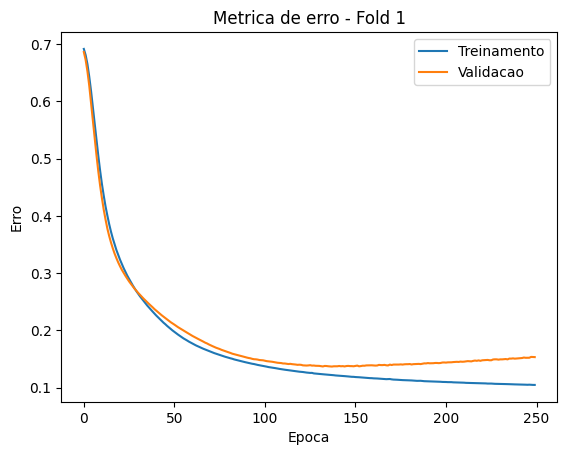

--> Acuracia (treino): 0.9662
--> Acuracia (validacao): 0.9286
--> Ein - Eval = 0.0376
--> val_loss - train_loss = 0.0486

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6997 - loss: 0.6917 - val_accuracy: 0.9048 - val_loss: 0.6853
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8515 - loss: 0.6837 - val_accuracy: 0.9048 - val_loss: 0.6716
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8878 - loss: 0.6693 - val_accuracy: 0.8889 - val_loss: 0.6507
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8641 - loss: 0.6512 - val_accuracy: 0.8889 - val_loss: 0.6239
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8600 - loss: 0.6277 - val_accuracy: 0.8889 - val_loss: 0.5935
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8778 - loss: 0.5977 - val_accuracy: 0.8889 - val_loss: 0.5600
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8606 - loss: 0.5695 - val_accuracy: 0.8889 - val_

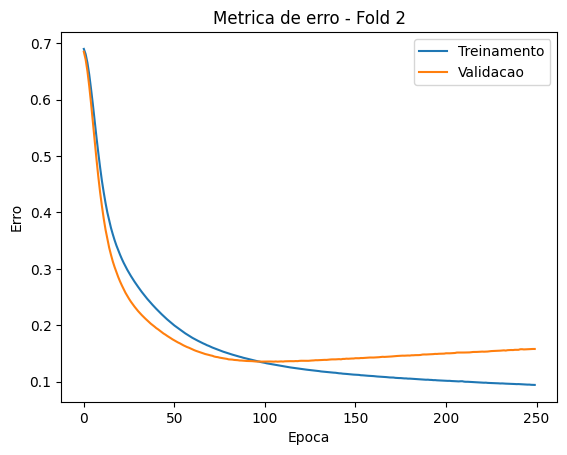

--> Acuracia (treino): 0.9642
--> Acuracia (validacao): 0.9365
--> Ein - Eval = 0.0277
--> val_loss - train_loss = 0.0638

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6415 - loss: 0.6874 - val_accuracy: 0.7857 - val_loss: 0.6736
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8312 - loss: 0.6688 - val_accuracy: 0.8016 - val_loss: 0.6561
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8150 - loss: 0.6513 - val_accuracy: 0.8333 - val_loss: 0.6344
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8683 - loss: 0.6231 - val_accuracy: 0.8413 - val_loss: 0.6080
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8710 - loss: 0.5938 - val_accuracy: 0.8492 - val_loss: 0.5788
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8636 - loss: 0.5720 - val_accuracy: 0.8571 - val_loss: 0.5498
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8923 - loss: 0.5343 - val_accuracy: 0.8571 - val_

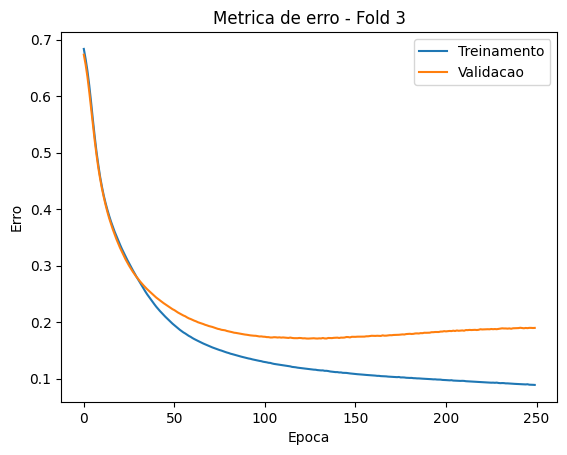

--> Acuracia (treino): 0.9662
--> Acuracia (validacao): 0.9365
--> Ein - Eval = 0.0297
--> val_loss - train_loss = 0.1010

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8418 - loss: 0.6874 - val_accuracy: 0.8492 - val_loss: 0.6799
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8520 - loss: 0.6769 - val_accuracy: 0.8730 - val_loss: 0.6652
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8685 - loss: 0.6601 - val_accuracy: 0.8730 - val_loss: 0.6447
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8752 - loss: 0.6358 - val_accuracy: 0.8730 - val_loss: 0.6196
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8760 - loss: 0.6074 - val_accuracy: 0.8730 - val_loss: 0.5917
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8682 - loss: 0.5816 - val_accuracy: 0.8730 - val_loss: 0.5640
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8742 - loss: 0.5511 - val_accuracy: 0.8730 - val_

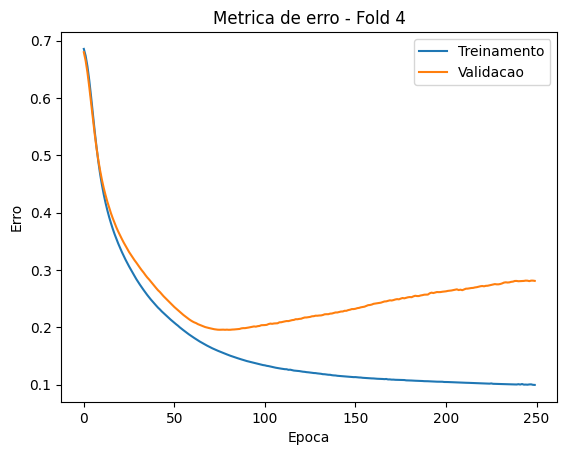

--> Acuracia (treino): 0.9622
--> Acuracia (validacao): 0.9365
--> Ein - Eval = 0.0257
--> val_loss - train_loss = 0.1814

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4750 - loss: 0.6941 - val_accuracy: 0.7360 - val_loss: 0.6890
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8167 - loss: 0.6859 - val_accuracy: 0.8240 - val_loss: 0.6798
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8663 - loss: 0.6735 - val_accuracy: 0.8480 - val_loss: 0.6649
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8843 - loss: 0.6535 - val_accuracy: 0.8640 - val_loss: 0.6454
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8761 - loss: 0.6280 - val_accuracy: 0.8640 - val_loss: 0.6225
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8892 - loss: 0.5994 - val_accuracy: 0.8560 - val_loss: 0.5978
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8903 - loss: 0.5659 - val_accuracy: 0.8560 - val

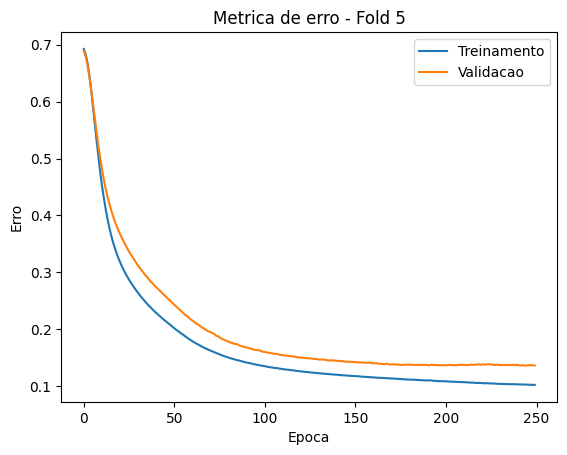

--> Acuracia (treino): 0.9663
--> Acuracia (validacao): 0.9440
--> Ein - Eval = 0.0223
--> val_loss - train_loss = 0.0341



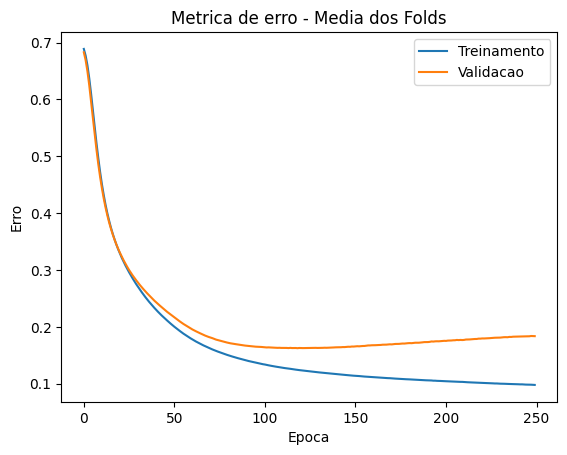

--> Acuracia media (treino): 0.9650
--> Acuracia media (validacao): 0.9364
--> acc_in - acc_val = 0.0286
--> loss medio do treino = 0.1681
--> loss medio da validacao = 0.2093
--> val_loss - train_loss = 0.0412



In [273]:
# Introduzindo o k-fold, com k=5
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
accuracies_train = []
accuracies_val = []
history_list = []
tamanho_history_history_loss_list = []
i = 0
for index_treino, index_val in kfold.split(X_train, Y_train):
    i += 1
    X_train_fold, X_val_fold = X_train[index_treino], X_train[index_val]
    Y_train_fold, Y_val_fold = Y_train[index_treino], Y_train[index_val]

    # Criando a rede neural
    model = Sequential()
    # Adicionando neurônios em uma camada oculta
    model.add(Dense(2, input_dim=29, kernel_initializer='normal', activation='selu')) #quantidade de neuronios na camada escondida, nº de features (selu, relu, gelu)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

    # adicionando a taxa de aprendizado
    learning_rate = 0.001  

    # Criando um otimizador Adam com a taxa de aprendizado desejada
    otimizador = optimizers.Adam(learning_rate=learning_rate)

    # Compilando o modelo
    model.compile(loss = 'binary_crossentropy', optimizer = otimizador, metrics = ['accuracy'])

    #Treinando o modelo
    history = model.fit(X_train_fold, Y_train_fold, validation_data=(X_val_fold, Y_val_fold), epochs=250, batch_size=BATCH_SIZE, verbose=1)
    history_list.append(history)
    tamanho_history_history_loss_list.append(len(history.history['loss']))

    # Avalia o modelo
    _, accuracy_train = model.evaluate(X_train_fold, Y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    _, accuracy_val = model.evaluate(X_val_fold, Y_val_fold, batch_size=BATCH_SIZE, verbose=0)
    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)

    # Exibe o historico de treinamento para um fold especifico
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento', 'Validacao'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> Ein - Eval = {accuracy_train - accuracy_val:.4f}") 
    print(f"--> val_loss - train_loss = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}\n")
       

# Calcula a acuracia media
acuracia_media_treino = np.mean(accuracies_train)
acuracia_media_validacao = np.mean(accuracies_val)

# Historico com valores medios dos folds
history_train_loss_avg_list = []
history_val_losso_avg_list = []

for epoca in range(max(tamanho_history_history_loss_list)):
    list_valores_loss_train = []
    list_valores_loss_val = []
    for j in range(len(history_list)):
        if epoca < len(history_list[j].history['loss']): # verifica se a epoca existe no historico do fold j por causa do early stopping
            list_valores_loss_train.append(history_list[j].history['loss'][epoca])
            list_valores_loss_val.append(history_list[j].history['val_loss'][epoca])
    history_train_loss_avg_list.append(np.mean(list_valores_loss_train)) # Calcula a média dos valores de loss para cada epoca (media da epoca 1, media da epoca 2...)
    history_val_losso_avg_list.append(np.mean(list_valores_loss_val))                           

loss_medio_treino = np.mean(history_train_loss_avg_list)
loss_medio_val = np.mean(history_val_losso_avg_list)

plt.plot(history_train_loss_avg_list)
plt.plot(history_val_losso_avg_list)
plt.title('Metrica de erro - Media dos Folds')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

print(f'--> Acuracia media (treino): {acuracia_media_treino:.4f}')
print(f'--> Acuracia media (validacao): {acuracia_media_validacao:.4f}')
print(f"--> acc_in - acc_val = {acuracia_media_treino - acuracia_media_validacao:.4f}")
print(f"--> loss medio do treino = {loss_medio_treino:.4f}")
print(f"--> loss medio da validacao = {loss_medio_val:.4f}")  
print(f"--> val_loss - train_loss = {(loss_medio_val - loss_medio_treino):.4f}\n")

# Kfold para eliminar o overfitting

Epoch 1/250


c:\Users\Bergson\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4372 - loss: 0.6984 - val_accuracy: 0.7540 - val_loss: 0.6841
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8026 - loss: 0.6822 - val_accuracy: 0.8651 - val_loss: 0.6659
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8673 - loss: 0.6630 - val_accuracy: 0.8889 - val_loss: 0.6430
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8760 - loss: 0.6432 - val_accuracy: 0.8889 - val_loss: 0.6168
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8590 - loss: 0.6177 - val_accuracy: 0.8889 - val_loss: 0.5881
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8707 - loss: 0.5922 - val_accuracy: 0.8889 - val_loss: 0.5589
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8718 - loss: 0.5601 - val_accuracy: 0.8889 - val_loss: 0.5300
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8763 - loss: 0.5346 - val_accuracy: 0.8889 - val_loss: 0.

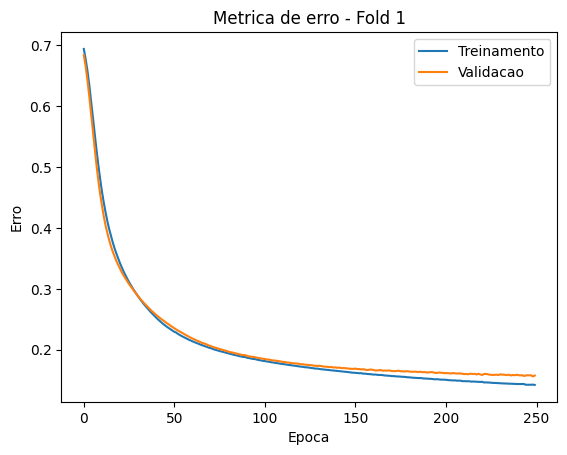

--> Acuracia (treino): 0.9583
--> Acuracia (validacao): 0.9444
--> Ein - Eval = 0.0138
--> val_loss - train_loss = 0.0155

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7913 - loss: 0.6884 - val_accuracy: 0.8651 - val_loss: 0.6780
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8600 - loss: 0.6747 - val_accuracy: 0.8968 - val_loss: 0.6589
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8575 - loss: 0.6577 - val_accuracy: 0.8889 - val_loss: 0.6352
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8787 - loss: 0.6369 - val_accuracy: 0.8889 - val_loss: 0.6081
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8456 - loss: 0.6177 - val_accuracy: 0.8889 - val_loss: 0.5796
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8776 - loss: 0.5881 - val_accuracy: 0.8968 - val_loss: 0.5494
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8806 - loss: 0.5595 - val_accuracy: 0.8968 - val_

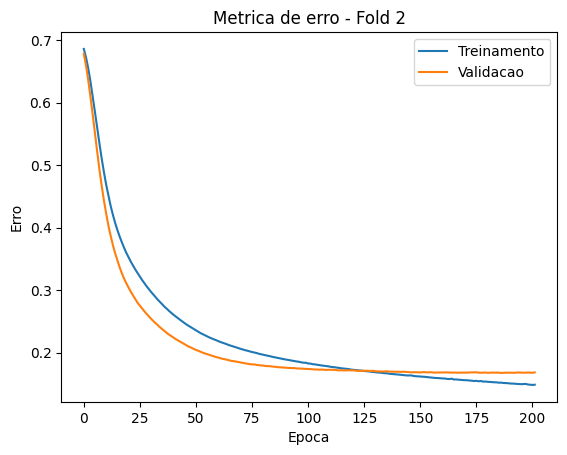

--> Acuracia (treino): 0.9583
--> Acuracia (validacao): 0.9444
--> Ein - Eval = 0.0138
--> val_loss - train_loss = 0.0197

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4208 - loss: 0.6961 - val_accuracy: 0.6825 - val_loss: 0.6932
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7708 - loss: 0.6906 - val_accuracy: 0.8254 - val_loss: 0.6855
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8412 - loss: 0.6803 - val_accuracy: 0.8333 - val_loss: 0.6711
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8443 - loss: 0.6623 - val_accuracy: 0.8413 - val_loss: 0.6491
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8713 - loss: 0.6357 - val_accuracy: 0.8413 - val_loss: 0.6219
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8619 - loss: 0.6048 - val_accuracy: 0.8492 - val_loss: 0.5925
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8830 - loss: 0.5759 - val_accuracy: 0.8571 - val_

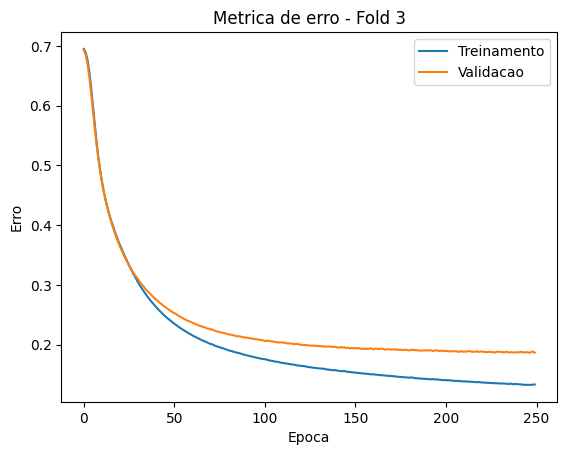

--> Acuracia (treino): 0.9583
--> Acuracia (validacao): 0.9524
--> Ein - Eval = 0.0059
--> val_loss - train_loss = 0.0533

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5276 - loss: 0.6934 - val_accuracy: 0.6905 - val_loss: 0.6859
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7842 - loss: 0.6798 - val_accuracy: 0.7937 - val_loss: 0.6706
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8273 - loss: 0.6618 - val_accuracy: 0.8175 - val_loss: 0.6494
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8572 - loss: 0.6351 - val_accuracy: 0.8254 - val_loss: 0.6240
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8638 - loss: 0.6101 - val_accuracy: 0.8413 - val_loss: 0.5968
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8522 - loss: 0.5857 - val_accuracy: 0.8651 - val_loss: 0.5699
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8893 - loss: 0.5491 - val_accuracy: 0.8651 - val_

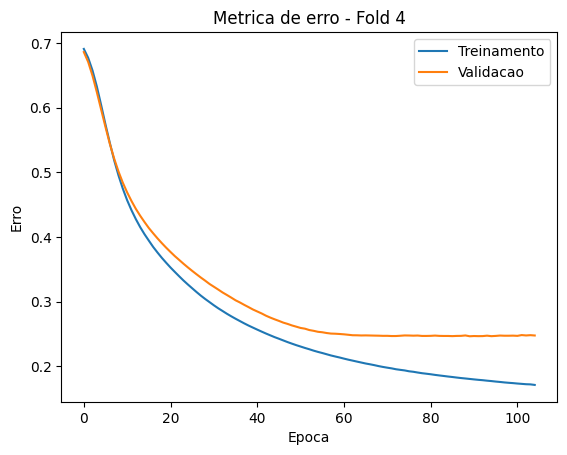

--> Acuracia (treino): 0.9543
--> Acuracia (validacao): 0.9206
--> Ein - Eval = 0.0336
--> val_loss - train_loss = 0.0764

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7773 - loss: 0.6884 - val_accuracy: 0.8160 - val_loss: 0.6815
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8339 - loss: 0.6775 - val_accuracy: 0.8240 - val_loss: 0.6685
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8435 - loss: 0.6609 - val_accuracy: 0.8480 - val_loss: 0.6504
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8813 - loss: 0.6343 - val_accuracy: 0.8400 - val_loss: 0.6288
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8739 - loss: 0.6083 - val_accuracy: 0.8480 - val_loss: 0.6055
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8604 - loss: 0.5819 - val_accuracy: 0.8480 - val_loss: 0.5812
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9039 - loss: 0.5380 - val_accuracy: 0.8480 - val_

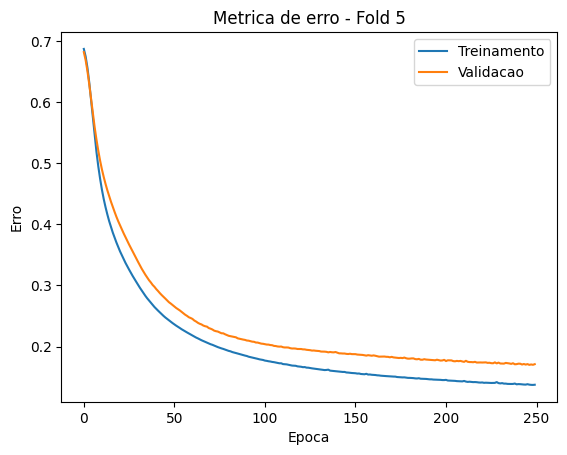

--> Acuracia (treino): 0.9583
--> Acuracia (validacao): 0.9360
--> Ein - Eval = 0.0223
--> val_loss - train_loss = 0.0336



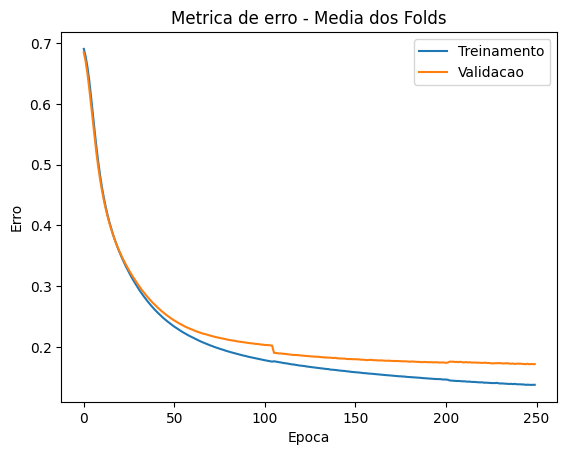

--> Acuracia media (treino): 0.9575
--> Acuracia media (validacao): 0.9396
--> acc_in - acc_val = 0.0179
--> loss medio do treino = 0.2062
--> loss medio da validacao = 0.2252
--> val_loss - train_loss = 0.0190



In [274]:
# Introduzindo o k-fold, com k=5
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
accuracies_train = []
accuracies_val = []
history_list = []
tamanho_history_history_loss_list = []
i = 0
for index_treino, index_val in kfold.split(X_train, Y_train):
    i += 1
    X_train_fold, X_val_fold = X_train[index_treino], X_train[index_val]
    Y_train_fold, Y_val_fold = Y_train[index_treino], Y_train[index_val]

    # Criando a rede neural
    model = Sequential()
    # Adicionando neurônios em uma camada oculta
    model.add(Dense(2, input_dim=29, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01) ,activation='selu')) #quantidade de neuronios na camada escondida, nº de features (selu, relu, gelu)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

    # adicionando a taxa de aprendizado
    learning_rate = 0.001  

    # Criando um otimizador Adam com a taxa de aprendizado desejada
    otimizador = optimizers.Adam(learning_rate=learning_rate)

    # Adicionando uma condição de parada antecipada
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

    # Compilando o modelo
    model.compile(loss = 'binary_crossentropy', optimizer = otimizador, metrics = ['accuracy'])

    #Treinando o modelo
    history = model.fit(X_train_fold, Y_train_fold, validation_data=(X_val_fold, Y_val_fold), epochs=250, batch_size=BATCH_SIZE, verbose=1, callbacks=[es])
    history_list.append(history)
    tamanho_history_history_loss_list.append(len(history.history['loss']))

    # Avalia o modelo
    _, accuracy_train = model.evaluate(X_train_fold, Y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    _, accuracy_val = model.evaluate(X_val_fold, Y_val_fold, batch_size=BATCH_SIZE, verbose=0)
    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)

    # Exibe o historico de treinamento para um fold especifico
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento', 'Validacao'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> Ein - Eval = {accuracy_train - accuracy_val:.4f}") 
    print(f"--> val_loss - train_loss = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}\n")
       

# Calcula a acuracia media
acuracia_media_treino = np.mean(accuracies_train)
acuracia_media_validacao = np.mean(accuracies_val)

# Historico com valores medios dos folds
history_train_loss_avg_list = []
history_val_losso_avg_list = []

for epoca in range(max(tamanho_history_history_loss_list)):
    list_valores_loss_train = []
    list_valores_loss_val = []
    for j in range(len(history_list)):
        if epoca < len(history_list[j].history['loss']): # verifica se a epoca existe no historico do fold j por causa do early stopping
            list_valores_loss_train.append(history_list[j].history['loss'][epoca])
            list_valores_loss_val.append(history_list[j].history['val_loss'][epoca])
    history_train_loss_avg_list.append(np.mean(list_valores_loss_train)) # Calcula a média dos valores de loss para cada epoca (media da epoca 1, media da epoca 2...)
    history_val_losso_avg_list.append(np.mean(list_valores_loss_val))                           

loss_medio_treino = np.mean(history_train_loss_avg_list)
loss_medio_val = np.mean(history_val_losso_avg_list)

plt.plot(history_train_loss_avg_list)
plt.plot(history_val_losso_avg_list)
plt.title('Metrica de erro - Media dos Folds')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

print(f'--> Acuracia media (treino): {acuracia_media_treino:.4f}')
print(f'--> Acuracia media (validacao): {acuracia_media_validacao:.4f}')
print(f"--> acc_in - acc_val = {acuracia_media_treino - acuracia_media_validacao:.4f}")
print(f"--> loss medio do treino = {loss_medio_treino:.4f}")
print(f"--> loss medio da validacao = {loss_medio_val:.4f}")  
print(f"--> val_loss - train_loss = {(loss_medio_val - loss_medio_treino):.4f}\n")


# Criando a rede neural com os hiperparâmetros escolhidos

- Número de neurônios na camada escondida = 2
- Função de ativação da camada escondida = selu
- Função de ativação da camada de saída = sigmoid
- Otimizador = adam (learning rate padrão, 0.001)
- Early Stopping com 15 épocas de paciência
- 250 épocas de treinamento

In [275]:
# Criando a rede neural
model = Sequential()
# Adicionando as camadas e os neurônios em cada camada
model.add(Dense(2, input_dim=29, kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01) ,activation='selu')) #quantidade de neuronios na camada escondida, nº de features
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

# Taxa de aprendizado do otimizador
learning_rate = 0.001

# Criando um otimizador Adam com a taxa de aprendizado
otimizador = optimizers.Adam(learning_rate=learning_rate)

# Adicionando uma condição de parada Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Compilando o modelo
model.compile(loss = 'binary_crossentropy', optimizer = otimizador, metrics = ['accuracy'])



In [276]:
# Treinando o modelo
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=250, batch_size=BATCH_SIZE, verbose=1, callbacks=[es])

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2638 - loss: 0.6987 - val_accuracy: 0.6013 - val_loss: 0.6931
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7016 - loss: 0.6914 - val_accuracy: 0.8291 - val_loss: 0.6853
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8326 - loss: 0.6819 - val_accuracy: 0.8354 - val_loss: 0.6714
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8484 - loss: 0.6668 - val_accuracy: 0.8418 - val_loss: 0.6481
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8362 - loss: 0.6399 - val_accuracy: 0.8608 - val_loss: 0.6157
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8624 - loss: 0.6051 - val_accuracy: 0.8608 - val_loss: 0.5794
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8705 - loss: 0.5639 - val_accuracy: 0.8797 - val_loss: 0.5430
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8797 - loss: 0.5270 - val_accuracy: 0.8797 - 

--> Acuracia (treino): 0.9571
--> Acuracia (validacao): 0.9557
--> Ein - Eval = 0.0014
--> val_loss - train_loss = 0.0291



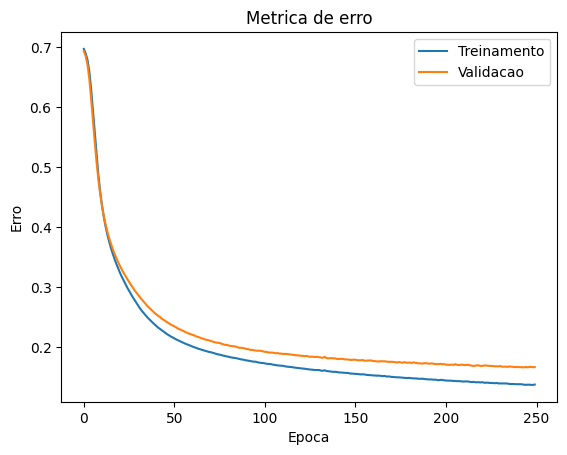

In [277]:
# Calculando a acuracia
_, accuracy_train = model.evaluate(X_train, Y_train, batch_size=BATCH_SIZE, verbose=0)
_, accuracy_val = model.evaluate(X_val, Y_val, batch_size=BATCH_SIZE, verbose=0)

# Plotando os resultados
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])


print(f'--> Acuracia (treino): {accuracy_train:.4f}')
print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
print(f"--> Ein - Eval = {accuracy_train - accuracy_val:.4f}") 
print(f"--> val_loss - train_loss = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}\n")


In [280]:
# Avaliando o modelo com o classification report
Y_pred_train = np.round(model.predict(X_train))
print('Classification Report (treino):')
print(classification_report(Y_train, Y_pred_train))
# Quantidade de amostras de cada classe
unique, counts = np.unique(Y_train, return_counts=True)
print("Quantidade de amostras de cada classe: ", dict(zip(unique, counts)))
unique, counts = np.unique(Y_pred_train, return_counts=True)
print("Quantidade de amostras previstas de cada classe: ", dict(zip(unique, counts)))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report (treino):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       312
           1       0.99      0.92      0.96       317

    accuracy                           0.96       629
   macro avg       0.96      0.96      0.96       629
weighted avg       0.96      0.96      0.96       629

Quantidade de amostras de cada classe:  {0: 312, 1: 317}
Quantidade de amostras previstas de cada classe:  {0.0: 333, 1.0: 296}


In [281]:
Y_pred_val = np.round(model.predict(X_val))
print('Classification Report (validacao):')
print(classification_report(Y_val, Y_pred_val))
unique, counts = np.unique(Y_val, return_counts=True)
print("Quantidade de amostras de cada classe: ", dict(zip(unique, counts)))
unique, counts = np.unique(Y_pred_val, return_counts=True)
print("Quantidade de amostras previstas de cada classe: ", dict(zip(unique, counts)))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report (validacao):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        78
           1       0.99      0.93      0.95        80

    accuracy                           0.96       158
   macro avg       0.96      0.96      0.96       158
weighted avg       0.96      0.96      0.96       158

Quantidade de amostras de cada classe:  {0: 78, 1: 80}
Quantidade de amostras previstas de cada classe:  {0.0: 83, 1.0: 75}


# Utilizando os dados de teste

In [ ]:
"""Y_pred_test = np.round(model.predict(X_test))
print('Classification Report (teste):')
print(classification_report(Y_test, Y_pred_test))
unique, counts = np.unique(Y_test, return_counts=True)
print("Quantidade de amostras de cada classe: ", dict(zip(unique, counts)))
unique, counts = np.unique(Y_pred_test, return_counts=True)
print("Quantidade de amostras previstas de cada classe: ", dict(zip(unique, counts)))"""